# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import argparse
import math
import os

## Define function for reading csv

In [2]:
def read_csv_(path):
    """
        function for reading csv
    :param path:
    :return:
    """
    conv__ = lambda k: 'NaN' if k == b'-' else float(k)
    return np.loadtxt(path, delimiter=',', skiprows=1, converters=conv__)

## Read csv and declare vars

In [3]:
inference_file = '../datasets/Ejercicio3/detection.csv'
groundtruth_file = '../datasets/Ejercicio3/groundtruth.csv'
inf_arr = read_csv_(inference_file)
gt_arr = read_csv_(groundtruth_file)
intervals = [(0, 50), (50, 100), (100, 150), (150, 200), (200, 250), (250, math.inf)]
output = ''

## Function for counting erros

In [4]:
def compute_perc(inf, gt, intervals):
    """
        function for computing percentages
        given predictions, inference and intervals
    :param inf:
    :param gt:
    :param intervals:
    :return:
    """
    absolutes = np.absolute(inf - gt)
    num = np.count_nonzero(np.isnan(inf))
    count_l = [num / len(inf) * 100]
    for i, j in intervals:
        r = np.count_nonzero((absolutes >= i) & (absolutes < j))
        count_l.append((r / len(inf)) * 100)
    return count_l

## Function for creating and saving figures 

In [5]:
def plot_and_save_figure(data, x_ticks, y_ticks, title_y, title_fig, colors, save_path):
    """
        function for generating graphs
    :param data:
    :param x_ticks:
    :param y_ticks:
    :param title_y:
    :param title_fig:
    :param colors:
    :param save_path:
    :return:
    """
    fig, ax = plt.subplots()
    ax.bar(x_ticks, data, align='center', width=0.5, color=colors)
    ax.set_ylabel(title_y)
    ax.set_title(title_fig)
    plt.yticks(y_ticks)
    plt.show()

## Common function for preparing data and building figures

In [6]:
def build(inf, gt, intervals, title, save_path):
    """
        auxiliary function that prepares the data necessary for the generation of the graphs
    :param inf:
    :param gt:
    :param intervals:
    :param title:
    :param save_path:
    :return:
    """
    data = compute_perc(inf, gt, intervals)

    if title == "Complexity":
        x_ticks = [f'{i}' for i, j in intervals[:-1]]
    else:
        x_ticks = [f'({i},{j})' for i, j in intervals[:-1]]

    x_ticks = ['error'] + x_ticks + [f'>{intervals[-1][0]}']
    y_ticks = np.arange(0, 120, 20)
    color = ['black'] + ['red'] * len(data)
    plot_and_save_figure(data, x_ticks, y_ticks, 'Percentage of blueprints',
                         title, color, save_path)

## Create figure Area2D

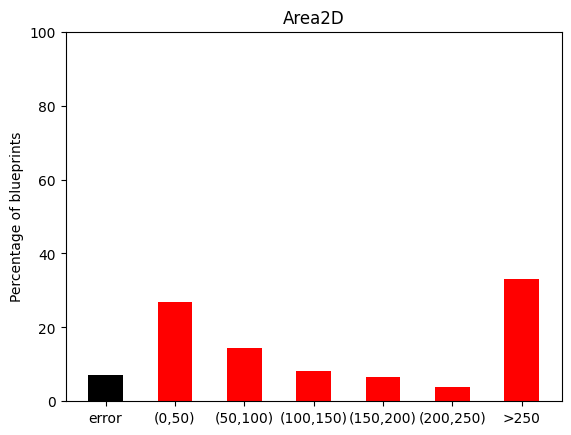

In [7]:
inf_2d, gt_2d = inf_arr[:, 1], gt_arr[:, 1]
build(inf_2d, gt_2d, intervals, 'Area2D', output + '/area2d.png')

## Create figure Area3

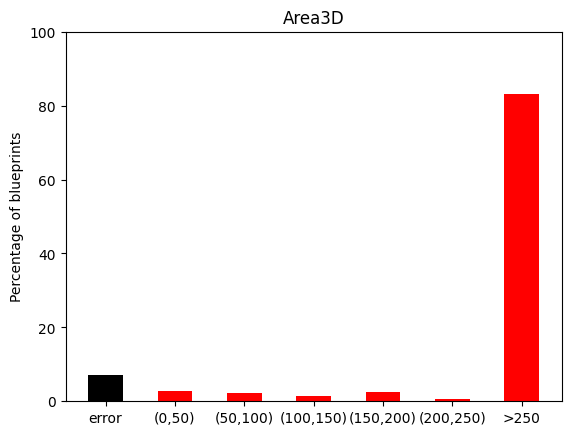

In [8]:
inf_3d, gt_3d = inf_arr[:, 2], gt_arr[:, 2]
build(inf_3d, gt_3d, intervals, 'Area3D', output + '/area3d.png')

## Create figure Complexity

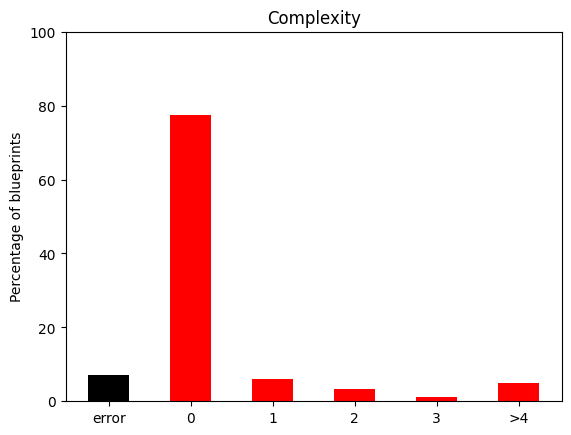

In [9]:
inf_c, gt_c = inf_arr[:, 3], gt_arr[:, 3]
interv_c = [(i, i + 1) for i in range(4)] + [(4, np.inf)]
build(inf_c, gt_c, interv_c, 'Complexity', output + '/complexity.png')